In [1]:
## cnn ipynb project start

'''
리모트 쉘에서 접속해서 사용하는 cnn 
cpu 기반 작동으로 진행할 예정 
LXC container에선 avx 명령어 문제가 있을 수 있음 
만약 문제가 되면 1. VM 2. 윈도우를 remote로 실행할 예정
노트북 호스트는 썩 좋지 않고 코랩은 런타임 날아가는게 종종 있다 보니 가능하면 로컬 진행 
'''

'\n리모트 쉘에서 접속해서 사용하는 cnn \ncpu 기반 작동으로 진행할 예정 \nLXC container에선 avx 명령어 문제가 있을 수 있음 \n만약 문제가 되면 1. VM 2. 윈도우를 remote로 실행할 예정\n노트북 호스트는 썩 좋지 않고 코랩은 런타임 날아가는게 종종 있다 보니 가능하면 로컬 진행 \n'

# first load 

In [2]:
import tensorflow as tf



2023-07-17 02:46:20.034004: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-17 02:46:20.035100: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-17 02:46:20.058545: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-17 02:46:20.058964: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-17 02:46:20.546086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [3]:
(x_train,y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#pixel view 

In [ ]:
x_train[0]

In [ ]:
y_train

In [ ]:
x_train.shape
y_train.shape

In [4]:
x_train = x_train /255 
x_test = x_test /255

x_train[0] ## normalized value 

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

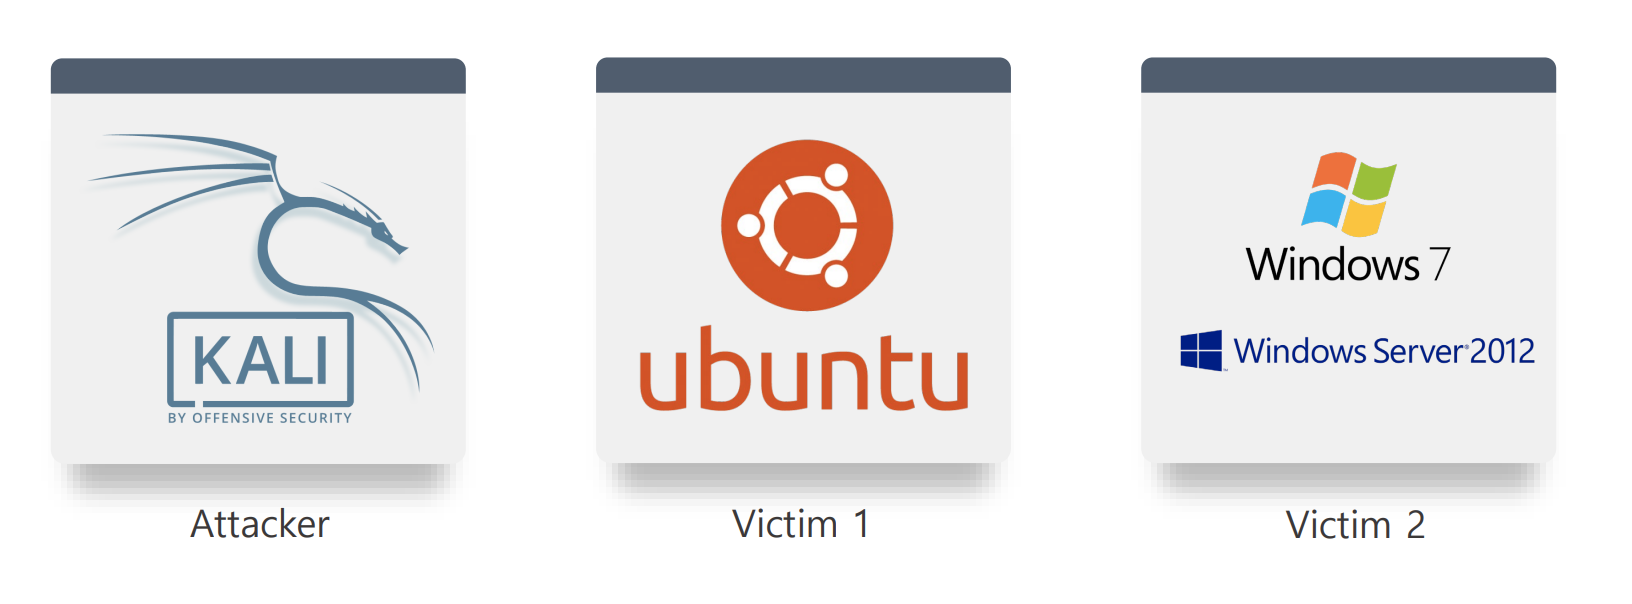

In [13]:
import numpy as np
from PIL import Image
img = Image.open('content/2022-09-01_231109.png')
np.array(img)
img

## 모델 쌓기 

In [5]:
from tensorflow.keras import layers
## use layers 

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


### 모델 컴파일 & train

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5387 - accuracy: 0.4363 - val_loss: 1.3607 - val_accuracy: 0.5017
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1691 - accuracy: 0.5849 - val_loss: 1.1319 - val_accuracy: 0.5943
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0272 - accuracy: 0.6376 - val_loss: 1.0277 - val_accuracy: 0.6413
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9278 - accuracy: 0.6728 - val_loss: 0.9621 - val_accuracy: 0.6619
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8439 - accuracy: 0.7045 - val_loss: 0.9118 - val_accuracy: 0.6818
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7844 - accuracy: 0.7242 - val_loss: 0.8942 - val_accuracy: 0.6947
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7282 - accuracy: 0.7432 - val_loss: 0.8652 - val_accuracy:

## 모델 평가 

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.8727 - accuracy: 0.7078


In [24]:
predictions = model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


In [16]:
# Obtain predictions from the model
model.predict(x_train)

# Evaluate the model's performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.8727 - accuracy: 0.7078
Test Loss: 0.8726819157600403
Test Accuracy: 0.7077999711036682
